In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df = pd.read_csv("mental_health_workplace_survey.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [7]:
df['Country'].value_counts()

Country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64

In [47]:
df['HasMentalHealthSupport'].value_counts()

HasMentalHealthSupport
No     1531
Yes    1469
Name: count, dtype: int64

In [46]:
df['HasTherapyAccess'].value_counts()

HasTherapyAccess
No     1511
Yes    1489
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64

In [9]:
df['JobRole'].value_counts()

JobRole
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64

In [10]:
df['Department'].value_counts()

Department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64

In [11]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64

In [73]:
categorical_columns = ['Department', 'Country', 'Gender', 'JobRole', 'RemoteWork', 'HasTherapyAccess', 'HasMentalHealthSupport']
# Perform one-hot encoding on all categorical columns at once
df_encoded = pd.get_dummies(df, columns=categorical_columns)   #One hot Encoding, is preferred because there is no order in between them in categorical columns
print("Encoded Data:")
df_encoded.head()
#df_encoded.columns.tolist()

Encoded Data:


,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,JobRole_Project Manager,JobRole_Sales Associate,JobRole_Software Engineer,RemoteWork_Hybrid,RemoteWork_No,RemoteWork_Yes,HasTherapyAccess_No,HasTherapyAccess_Yes,HasMentalHealthSupport_No,HasMentalHealthSupport_Yes
0,1001,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,...,False,True,False,False,True,False,False,True,True,False
1,1002,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,...,False,False,True,True,False,False,False,True,False,True
2,1003,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,...,False,False,False,True,False,False,True,False,True,False
3,1004,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,...,False,False,False,False,False,True,False,True,False,True
4,1005,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,...,False,False,False,False,False,True,False,True,False,True


In [76]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_scaled = df_scaled.drop(columns=['SalaryRange'])


In [75]:
print("Scaled Data:")
df_scaled.head()

Scaled Data:


,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,JobRole_Project Manager,JobRole_Sales Associate,JobRole_Software Engineer,RemoteWork_Hybrid,RemoteWork_No,RemoteWork_Yes,HasTherapyAccess_No,HasTherapyAccess_Yes,HasMentalHealthSupport_No,HasMentalHealthSupport_Yes
0,-1.731474,0.835099,0.646445,0.293989,-0.831171,-0.145528,1.519164,-0.521468,0.319776,1.003164,...,False,True,False,False,True,False,False,True,True,False
1,-1.730319,-0.436487,-1.508004,1.707398,0.730817,-1.325175,0.051725,-0.682562,0.458507,1.387705,...,False,False,True,True,False,False,False,True,False,True
2,-1.729164,-1.072280,0.480718,1.707398,0.618137,0.667888,0.070933,1.258235,-0.928806,1.632414,...,False,False,False,True,False,False,True,False,True,False
3,-1.728009,0.108478,0.812172,-1.590556,-0.516442,-0.646685,0.339835,-0.318183,1.498992,0.269039,...,False,False,False,False,False,True,False,True,False,True
4,-1.726855,-0.073177,-0.679370,-1.237204,1.076631,-1.194103,-0.808762,-1.303924,-1.622463,-0.604919,...,False,False,False,False,False,True,False,True,False,True


In [55]:
# Split features and target
X = df_scaled.drop(columns=['StressLevel'])
y = df_scaled['StressLevel']

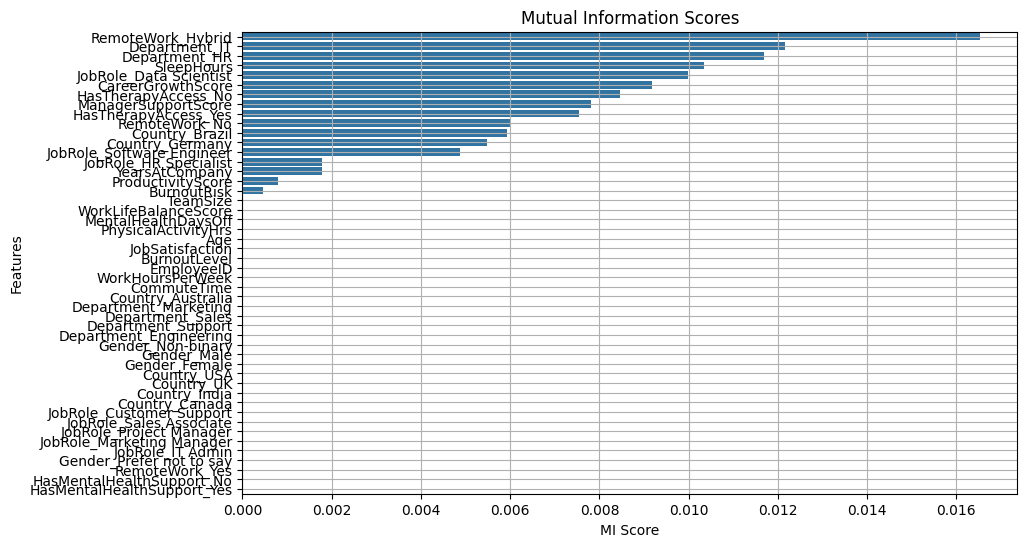

In [56]:
mi_scores = mutual_info_regression(X, y, random_state=42)

# Store in DataFrame for sorting
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot top MI features
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_df['MI Score'], y=mi_df['Feature'])
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# Select top k features with highest MI score (e.g., top 15)
top_mi_features = mi_df.head(15)['Feature'].tolist()

# Final features from mutual information
X_mi_selected = X[top_mi_features]

In [72]:
X_selected = X_scaled[X_scaled.columns[mi_scores > 0]]
y = df_scaled['StressLevel']
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=52
)

# models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("----------------------------------")
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("----------------------------------")
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Linear Regression:
MSE: 0.9694648716265669
R2 Score: 0.0029017170229800326
----------------------------------
Ridge Regression:
MSE: 0.9694633378207436
R2 Score: 0.0029032945480639283
----------------------------------
Lasso Regression:
MSE: 0.9723675555034471
R2 Score: -8.370431034410153e-05


In [77]:
# EXPLANATION
### Feature Selection Logic ###
# The feature selection in this model was done using Mutual Information, which measures how much information each feature contributes to predicting the target variable. Features with a mutual information score greater than zero were selected, as they have at least some dependency with the target. This approach helps eliminate irrelevant or redundant features, reducing model complexity and the risk of overfitting. By focusing only on the most informative variables, the model can achieve better performance and generalization on unseen data.
# Short summary: Which model performed best and why?
# Among the models tested—Linear Regression, Ridge Regression, and Lasso Regression—Ridge Regression performed the best, but all models performed poorly, indicating that the current features do not effectively predict the target (SalaryRange).This is because Ridge handles multicollinearity more effectively by applying L2 regularization, which shrinks the coefficients of less important features without eliminating them entirely.